# 0. Setup Paths

In [1]:
import os
import sys


print("User Current Version:-", sys.version)


User Current Version:- 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]


In [2]:
#paths['SCRIPTS_PATH']

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet8' #al reentrenar cambiar este nombre y ejecutar todo de nuevo no el step 1
PRETRAINED_MODEL_NAME_unused = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'

PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
PRETRAINED_MODEL_URL_unused = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [31]:
# https://www.tensorflow.org/install/source_windows
import wget

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:   8% (287/3242)
Updating files:   9% (292/3242)
Updating files:  10% (325/3242)
Updating files:  11% (357/3242)
Updating files:  12% (390/3242)
Updating files:  13% (422/3242)
Updating files:  14% (454/3242)
Updating files:  15% (487/3242)
Updating files:  16% (519/3242)
Updating files:  17% (552/3242)
Updating files:  18% (584/3242)
Updating files:  18% (590/3242)
Updating files:  19% (616/3242)
Updating files:  20% (649/3242)
Updating files:  21% (681/3242)
Updating files:  22% (714/3242)
Updating files:  23% (746/3242)
Updating files:  24% (779/3242)
Updating files:  25% (811/3242)
Updating files:  26% (843/3242)
Updating files:  26% (844/3242)
Updating files:  27% (876/3242)
Updating files:  28% (908/3242)
Updating files:  29% (941/3242)
Updating files:  30% (973/3242)
Updating files:  31% (1006/3242)
Updating files:  32% (1038/3242)
Updating files:  33% (1070/3242)
Updating files:  34% (1103/3242)
Updating files:  35% (1135/3242)

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
error: [Errno 2] No such file or directory: 'c:\\users\\javie\\appdata\\local\\continuum\\anaconda3\\envs\\tfod3\\lib\\site-packages\\tensorflow_model_optimization-0.7.2-py3.7.egg\\tensorflow_model_optimization\\python\\core\\quantization\\keras\\collaborative_optimizations\\cluster_preserve\\cluster_preserve_quantize_registry.py'


copying object_detection\inference\detection_inference.py -> build\lib\object_detection\inference
copying object_detection\inference\detection_inference_tf1_test.py -> build\lib\object_detection\inference
copying object_detection\inference\infer_detections.py -> build\lib\object_detection\inference
copying object_detection\inference\__init__.py -> build\lib\object_detection\inference
creating build\lib\object_detection\legacy
copying object_detection\legacy\eval.py -> build\lib\object_detection\legacy
copying object_detection\legacy\evaluator.py -> build\lib\object_detection\legacy
copying object_detection\legacy\train.py -> build\lib\object_detection\legacy
copying object_detection\legacy\trainer.py -> build\lib\object_detection\legacy
copying object_detection\legacy\trainer_tf1_test.py -> build\lib\object_detection\legacy
copying object_detection\legacy\__init__.py -> build\lib\object_detection\legacy
creating build\lib\object_detection\matchers
copying object_detection\matchers\argm

copying build\lib\object_detection\model_lib_tf2_test.py -> build\bdist.win-amd64\egg\object_detection
copying build\lib\object_detection\model_lib_v2.py -> build\bdist.win-amd64\egg\object_detection
copying build\lib\object_detection\model_main.py -> build\bdist.win-amd64\egg\object_detection
copying build\lib\object_detection\model_main_tf2.py -> build\bdist.win-amd64\egg\object_detection
copying build\lib\object_detection\model_tpu_main.py -> build\bdist.win-amd64\egg\object_detection
creating build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\convolutional_box_predictor.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\convolutional_box_predictor_tf1_test.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\convolutional_keras_box_predictor.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_de

Obtaining file:///D:/Anaconda_en_DiscoD/car_plate_detection/TFODCourse/Tensorflow/models/research/slim
  Running setup.py develop for slim


In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-03-24 19:53:45.676204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-24 19:53:45.676593: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-24 19:54:04.966471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-03-24 19:54:04.966880: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-24 19:54:04.973993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-EODGJFJT
2022-03-24 19:54:04.974213: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-EODGJFJT
Running tests under Python 3.7.11: C:\Users\javie\AppData\Local\Continuum\anaconda3\envs\tfod3\python.exe


[       OK ] ModelBuilderTF2Test.test_create_ssd_models_from_config
[ RUN      ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
I0324 19:55:21.225018 19372 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
[ RUN      ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
I0324 19:55:21.227018 19372 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
[ RUN      ] ModelBuilderTF2Test.test_invalid_model_config_proto
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_model_config_proto): 0.0s
I0324 19:55:21.2

In [15]:
!pip install tensorflow --upgrade

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tf_estimator_nightly-2.5.0.dev2021032501-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow-datasets 4.2.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.2.0 requires dill, which is not installed.
tensorflow-datasets 4.2.0 requires future, which is not installed.
tensorflow-datasets 4.2.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.2.0 re

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [8]:
import object_detection

In [18]:
!pip install PyYAML==5.1

  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\javie\\appdata\\local\\continuum\\anaconda3\\envs\\tfod3\\lib\\site-packages\\~aml\\_yaml.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [16]:
!pip install opencv-python-headless==4.5.4.60

  Using cached opencv_python_headless-4.5.4.60-cp37-cp37m-win_amd64.whl (35.0 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\javie\\AppData\\Local\\Temp\\pip-uninstall-fxhxw6j7\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [8]:
!pip list

Package                            Version              Location
---------------------------------- -------------------- -------------------------------------------------------------------------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-project                   0.10.2
anyio                              3.5.0
apache-beam                        2.37.0
appdirs                            1.4.4
argcomplete                        1.12.3
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autope

colorama                           0.4.4
comtypes                           1.1.10
conda                              4.11.0
conda-content-trust                0+unknown
conda-pack                         0.6.0
conda-package-handling             1.7.3
conda-token                        0.3.0
contextlib2                        0.6.0.post1
cookiecutter                       1.7.2
cryptography                       36.0.0
cycler                             0.11.0
Cython                             0.29.25
cytoolz                            0.11.0
daal4py                            2021.5.0
dask                               2021.10.0
debugpy                            1.5.1
decorator                          5.1.1
defusedxml                         0.7.1
diff-match-patch                   20200713
dill                               0.3.4
distributed                        2021.10.0
dm-tree                            0.1.7
docutils                           0.17.1
easyocr                  

sphinxcontrib-htmlhelp             2.0.0
sphinxcontrib-jsmath               1.0.1
sphinxcontrib-qthelp               1.0.3
sphinxcontrib-serializinghtml      1.1.5
sphinxcontrib-websupport           1.2.4
spyder                             5.1.5
spyder-kernels                     2.1.3
SQLAlchemy                         1.4.27
statsmodels                        0.12.2
sympy                              1.9
tables                             3.6.1
tabulate                           0.8.9
TBB                                0.2
tblib                              1.7.0
tensorboard                        2.8.0
tensorboard-data-server            0.6.1
tensorboard-plugin-wit             1.8.1
tensorflow                         2.8.0
tensorflow-addons                  0.16.1
tensorflow-datasets                4.5.2
tensorflow-hub                     0.12.0
tensorflow-io                      0.24.0
tensorflow-io-gcs-filesystem       0.24.0
tensorflow-metadata                1.7.0
tensorflow-mod

In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [9]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [9]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20518283 / 20518283        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [11]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [9]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [52]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [53]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [54]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [12]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [9]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [10]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [58]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [59]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [60]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [5]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [62]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [208]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

TypeError: list indices must be integers or slices, not str

In [63]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet8_TUNED --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet8_TUNED\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [6]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [7]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet8 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet8\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet8


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [7]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [8]:
configs['model']

NameError: name 'configs' is not defined

In [8]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-17')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [16]:
#import cv2 

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [19]:
import glob
import os
files=glob.glob('D:\\Anaconda_en_DiscoD\\car_plate_detection\\TFODCourse\\Tensorflow\\workspace\\images\\xml_and_images\\*.jpeg')
IMAGE_PATH=files[-1]
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)


label_id_offset = 1
image_np_with_detections = image_np.copy()

In [29]:
import glob
import os
files=glob.glob('D:\\Anaconda_en_DiscoD\\car_plate_detection\\TFODCourse\\Tensorflow\\workspace\\images\\xml_and_images\\*.jpg')
IMAGE_PATH=files[-3]

In [14]:
IMAGE_PATH='D:\\Anaconda_en_DiscoD\\car_plate_detection\\TFODCourse\\Tensorflow\\workspace\\images\\xml_and_images\\owntest26.jpeg'

In [11]:
import glob
import os
files=glob.glob('D:\Anaconda_en_DiscoD\car_plate_detection\TFODCourse\Tensorflow\workspace\images\\xml_and_images\*.jpeg')

IMAGE_PATH=files[-8]
IMAGE_PATH

'D:\\Anaconda_en_DiscoD\\car_plate_detection\\TFODCourse\\Tensorflow\\workspace\\images\\xml_and_images\\owntest27.jpeg'

In [20]:
max(detections['detection_scores'])


0.83428675

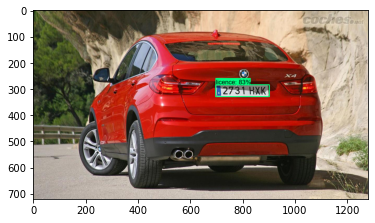

In [12]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()#visualizamos el resultado de la detección sobre la imagen de entrada

In [13]:
import easyocr

In [14]:
from matplotlib import pyplot as plt 

In [15]:
def filter_text(region,ocr_result,region_threshold):
    rectangle_size= region.shape[0]*region.shape[1]#area del rectangulo
    
    plate=[]
    
    for result in ocr_result:
        length=np.sum(np.subtract(result[0][1], result[0][0]))
        height=np.sum(np.subtract(result[0][2],result[0][1]))
        
        #print(length,width)
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [16]:

def ocr_it(image,detections,detection_threshold,region_threshold):
    
    #scores boxes and classes above threhold
    scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    #full image dedimension
    width=image.shape[1]
    height=image.shape[0]
    width2=image.shape[1]+1.18*image.shape[1]/100

    #Apply ROI filtering and OCR
    for idx,box in enumerate(boxes):
        roi=box*[height,width2,height,width]
        region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader=easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text=filter_text(region,ocr_result,region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['2731 KXK']


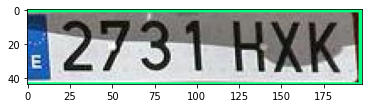

In [65]:
#from matplotlib import pyplot as plt #si no funciona poner este import o ejecutar !pip uninstall opencv-python-headless -y
detection_threshold=0.45
region_threshold=0.46
text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['2731 KXK']


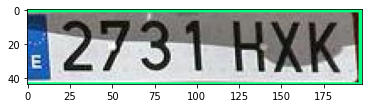

In [25]:
#from matplotlib import pyplot as plt #si no funciona poner este import o ejecutar !pip uninstall opencv-python-headless -y
detection_threshold=0.5
region_threshold=0.6
text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)

In [37]:
#!pip install opencv-python-headless==4.5.4.60

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0724 HPH']


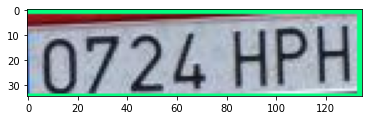

In [43]:
#from matplotlib import pyplot as plt #si no funciona poner este import o ejecutar !pip uninstall opencv-python-headless -y
detection_threshold=0.5
region_threshold=0.6
text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)

In [38]:
#!pip list

In [44]:
#pip uninstall opencv-python-headless -y


In [45]:
#pip install opencv-python --upgrade

# 10. Real Time Detections from your Webcam

In [46]:
#!pip uninstall opencv-python-headless -y

In [50]:
#pip install opencv-python==4.5.4.60

  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.62
    Uninstalling opencv-python-4.5.5.62:
      Successfully uninstalled opencv-python-4.5.5.62
Note: you may need to restart the kernel to use updated packages.


In [59]:
#pip install opencv-contrib-python #cuanddo falla el opencv puede ser que no esten bien estos tres open kibrerias

Note: you may need to restart the kernel to use updated packages.


In [60]:
!pip list

Package                            Version              Location


---------------------------------- -------------------- -------------------------------------------------------------------------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-project                   0.10.2
anyio                              3.5.0
apache-beam                        2.37.0
appdirs                            1.4.4
argcomplete                        1.12.3
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autopep8                           1.6.0
avro-python3                 

scikit-learn                       1.0.2
scikit-learn-intelex               2021.20220215.153008
scipy                              1.7.3
seaborn                            0.11.2
Send2Trash                         1.8.0
sentencepiece                      0.1.96
seqeval                            1.2.2
setuptools                         58.0.4
simplegeneric                      0.8.1
singledispatch                     3.7.0
sip                                4.19.13
six                                1.16.0
slim                               0.1                  d:\anaconda_en_discod\car_plate_detection3\tfodcourse\tensorflow\models\research\slim
sniffio                            1.2.0
snowballstemmer                    2.2.0
sortedcollections                  2.1.0
sortedcontainers                   2.4.0
soupsieve                          2.3.1
Sphinx                             4.4.0
sphinxcontrib-applehelp            1.0.2
sphinxcontrib-devhelp              1.0.2
sphinxcontrib-htm

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DDLL']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['6u9d']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['5849 GPM']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


KeyboardInterrupt: 

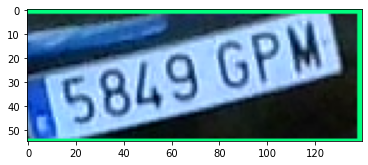

In [29]:
detection_threshold=0.67
region_threshold=0.67
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.72,
                agnostic_mode=False)

    
    try: 
        text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
    except:
        pass
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    save_results(text,region,'realtime_results4.csv','Detection_Images')
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

## Save Results

In [21]:
import csv
import uuid#unique unifor identify

In [18]:
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('D:\\Anaconda_en_DiscoD\\car_plate_detection\\TFODCourse')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: D:\Anaconda_en_DiscoD\car_plate_detection\TFODCourse
Current working directory: D:\Anaconda_en_DiscoD\car_plate_detection\TFODCourse


In [23]:
text='text'

In [19]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
def save_results(text,region,csv_filename,folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())#crea un nombre unico
    now = datetime.now()

    current_time = now.strftime("%H:%M:%S")
    cv2.imwrite(os.path.join(folder_path,img_name), region)
    
    with open(csv_filename,mode='a',newline='') as f:
        csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name,text,current_time])

Current Time = 17:52:09


In [64]:
save_results(text,region,'detections_results.csv','Detection_Images')

In [19]:
img_name = '{}.jpg'.format(uuid.uuid1())#crea un nombre unico
img_name

'b8ebe9f4-d78a-11ec-9966-28cdc4b781c8.jpg'

In [27]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()q
        cv2.destroyAllWindows()
        break

SyntaxError: invalid syntax (Temp/ipykernel_19856/3011545337.py, line 37)

In [2]:
!pip uninstall opencv-python-headless -y
#pip uninstall opencv-python 

In [53]:
pip install opencv-python==4.5.4.60


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [45]:
pip install opencv-contrib-python==4.5.5.62


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [46]:
pip install opencv-python-headless==4.5.4.60

  Using cached opencv_python_headless-4.5.4.60-cp37-cp37m-win_amd64.whl (35.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [40]:
pip install opencv-python --upgrade

  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.62
    Uninstalling opencv-python-4.5.5.62:
      Successfully uninstalled opencv-python-4.5.5.62
  Rolling back uninstall of opencv-python
  Moving to c:\users\javie\appdata\local\continuum\anaconda3\envs\tfod3\lib\site-packages\opencv_python-4.5.5.62.dist-info\
   from c:\users\javie\appdata\local\continuum\anaconda3\envs\tfod3\lib\site-packages\~pencv_python-4.5.5.62.dist-info
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [47]:
!pip list

Package                            Version              Location
---------------------------------- -------------------- -------------------------------------------------------------------------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-project                   0.10.2
anyio                              3.5.0
apache-beam                        2.37.0
appdirs                            1.4.4
argcomplete                        1.12.3
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autope

In [23]:

detection_threshold=0.5
image=image_np_with_detections
scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]
width=image.shape[1]
height=image.shape[0]

for idx,box in enumerate(boxes):
    roi=box*[height,width,height,width]
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader=easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


error: Unknown C++ exception from OpenCV code

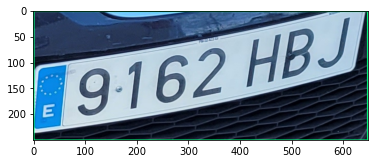

In [40]:

detection_threshold=0.5
image=image_np_with_detections
scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]
width=image.shape[1]
height=image.shape[0]

for idx,box in enumerate(boxes):
    roi=box*[height,width,height,width]
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    

In [376]:
import easyocr

In [39]:
width=image.shape[1]
height=image.shape[0]

for idx,box in enumerate(boxes):
    roi=box*[height,width,height,width]
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader=easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    

NameError: name 'image' is not defined

In [86]:
ocr_result[0][1].upper()

'7045KDM'

## OCR filtering

In [98]:
for result in ocr_result:
    print(result)

([[85, 31], [1115, 31], [1115, 195], [85, 195]], 'VAVACARS', 0.9673253294729226)


In [38]:
region_threshold=0.6
def filter_text(region,ocr_result,region_threshold):
    rectangle_size= region.shape[0]*region.shape[1]#area del rectangulo
    
    plate=[]
    
    for result in ocr_result:
        length=np.sum(np.subtract(result[0][1], result[0][0]))
        height=np.sum(np.subtract(result[0][2],result[0][1]))
        
        #print(length,width)
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [104]:
filter_text(region,ocr_result,0.56)

['VAVACARS']

In [21]:
detections['detection_scores']

array([0.8414568 , 0.13265133, 0.09472543, 0.08675036, 0.0683625 ,
       0.06729931, 0.06461725, 0.06214657, 0.05565301, 0.04914027,
       0.04718518, 0.04420522, 0.04014418, 0.03942546, 0.03800541,
       0.03702477, 0.0364587 , 0.03618509, 0.03383762, 0.03383398,
       0.03371245, 0.03303105, 0.03288481, 0.03286538, 0.03227314,
       0.03162822, 0.03152454, 0.03128028, 0.03082901, 0.0307827 ,
       0.03071502, 0.03029785, 0.03015089, 0.02992913, 0.02963126,
       0.02950469, 0.02944413, 0.02937043, 0.02905941, 0.02893609,
       0.02856627, 0.0284895 , 0.02842033, 0.02831674, 0.02819204,
       0.02813354, 0.02785707, 0.02725294, 0.02720076, 0.02647549,
       0.02621615, 0.02607661, 0.02605754, 0.02574933, 0.02565688,
       0.02563053, 0.02548081, 0.02544242, 0.02514458, 0.02501225,
       0.02500609, 0.02472615, 0.0245162 , 0.02398846, 0.02395573,
       0.02384481, 0.02366289, 0.02351859, 0.02347699, 0.02346423,
       0.02333891, 0.02323997, 0.02295575, 0.02279961, 0.02278

In [23]:
detections['num_detections']

100

In [24]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [29]:
!pip install oauth2client sacrebleu pyyaml tensorflow-model-optimization tensorflow-datasets seqeval sentencepiece py-cpuinfo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.37.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.37.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.37.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.37.0 requires orjson<4.0, which is not installed.
apache-beam 2.37.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.37.0 requires pyarrow<7.0.0,>=0.15.1, which is not installed.
apache-beam 2.37.0 requires pydot<2,>=1.2.0, which is not installed.
apache-beam 2.37.0 requires pymongo<4.0.0,>=3.8.0, which is not installed.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0 which is incompatible.
apache-beam 2.37.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.37.0 requires httplib2<0.20.0,>=0.8, but y

  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=4dd60c413031cd6c74ef5e9ee038cec89179e0a89a2ac7dc1aadbeca4ae12548
  Stored in directory: c:\users\javie\appdata\local\pip\cache\wheels\05\96\ee\7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=0fb58f22c7da3f363d06b656301674d0f3543ac7cbc547d15a4255383b24e5d4
  Stored in directory: c:\users\javie\appdata\local\pip\cache\wheels\d2\f1\1f\041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21503 sha256=a014efb4f84a1c18ca4d502d671335d1b1b2738c5907bf8f3253b91bf2e6303f
  Stored in directory: c:\users\javie\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built seqeval py-cpuinfo promise


In [30]:
!pip install easyocr

In [26]:
pip list

Package                            Version              Location
---------------------------------- -------------------- -------------------------------------------------------------------------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-project                   0.10.2
anyio                              3.5.0
apache-beam                        2.37.0
appdirs                            1.4.4
argcomplete                        1.12.3
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autope


tensorflow-addons                  0.16.1
tensorflow-hub                     0.12.0
tensorflow-io                      0.24.0
tensorflow-io-gcs-filesystem       0.24.0
tensorflow-text                    2.8.1
tensorflowjs                       3.14.0
termcolor                          1.1.0
terminado                          0.13.1
testpath                           0.5.0
text-unidecode                     1.3
textdistance                       4.2.1
tf-estimator-nightly               2.8.0.dev2021122109
tf-models-official                 2.8.0
tf-slim                            1.1.0
threadpoolctl                      2.2.0
three-merge                        0.1.1
tifffile                           2021.7.2
tinycss                            0.4
toml                               0.10.2
toolz                              0.11.2
torch                              1.11.0
torchvision                        0.12.0
tornado                            6.1
tqdm                               

In [ ]:
#Una vez identificada la matrícula nuestro objetivo será obtener la información que guarda una matricula, para almacenar así ese distintivo unico de cada vehiculo.
#Para ello primero definiremos un umbral de deteccion minimo que dictará sobre que umbral en especifico vamos a renderizar nuestros resultados, esto para definir como de precisos será nuestra caja(rectanfgulo) que identifica la matricula con respecto a toda la imagen
#con esto, trabajaremos con la imagen vectorizada que será pasada sobre tres componentes diferentes:
#scores, hace referencia a la mejor puntuación predicha del modelo en el caso de la imagen es el 0.94 que vimos,
#boxes
#classes

In [333]:
files

['D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest1.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest10.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest15.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest21.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest27.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest28.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest3.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest7.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest8.jpeg',
 'D:\\Anaconda_en_DiscoD\\Plate_detection\\Tensorflow\\workspace\\images\\usedtest\\owntest9.jp

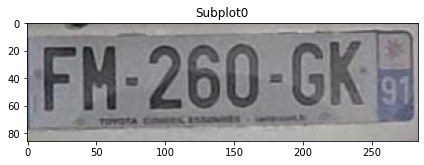

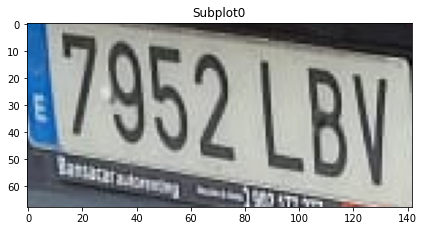

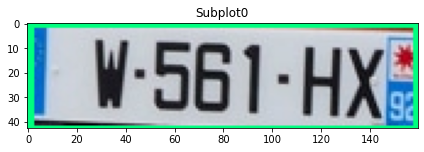

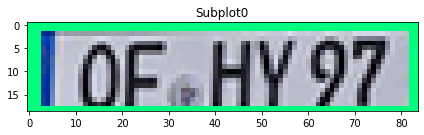

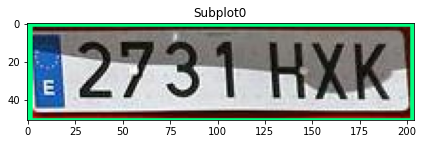

In [344]:
import time
for i,pos in enumerate(files[:5]):
    IMAGE_PATH=pos
    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    detection_threshold=0.5
    image=image_np_with_detections
    scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    if image.shape[1]>500 and image.shape[1] <1000:
        width2=image.shape[1]+1.95*image.shape[1]/100
    elif image.shape[1]<=500:
        width2=image.shape[1]+1.95*image.shape[1]/100
    elif image.shape[1]>=1000:
        width2=image.shape[1]+2.75*image.shape[1]/100
    width=image.shape[1]
    height=image.shape[0]

    for idx,box in enumerate(boxes):
        roi=box*[height,width,height,width]
        region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        
        width=5
        height=5
        rows = 1
        cols = 1
        axes=[]
        fig=plt.figure()

        for a in range(rows*cols):
            b = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)
            axes.append( fig.add_subplot(rows, cols, a+1) )
            subplot_title=("Subplot"+str(a))
            axes[-1].set_title(subplot_title)  
            plt.imshow(b)
        fig.tight_layout()    
        plt.show()
    
    

1435


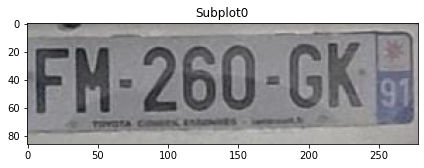

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 7], [249, 7], [249, 73], [0, 73]], 'FM:260-GK|', 0.5222721701588281)]
1512


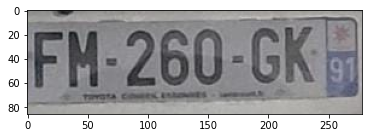

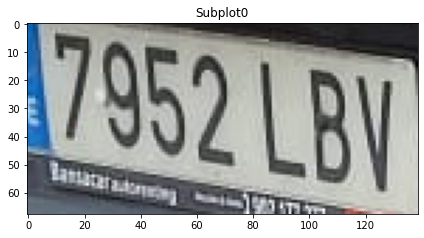

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[76, 10], [139, 10], [139, 66], [76, 66]], 'LBV', 0.8978639649147818), ([[5.945256169098055, -5.906565453050892], [88.4690303387044, 6.532266798389481], [78.05474383090194, 61.906565453050895], [-4.469030338704394, 48.46773320161052]], '17952 5', 0.37134437884243526)]
1500


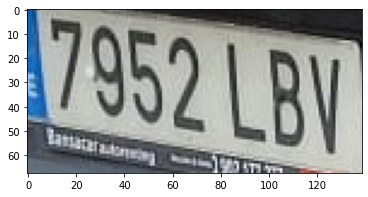

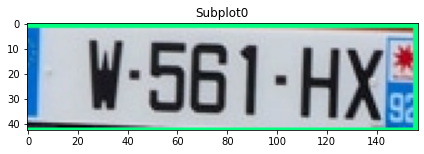

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 3], [149, 3], [149, 43], [19, 43]], 'V561-HX', 0.27251296468251035)]
650


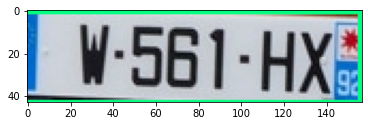

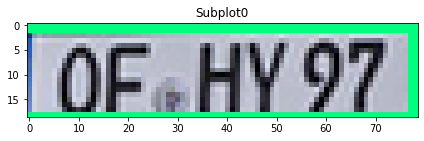

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 1], [75, 1], [75, 19], [3, 19]], 'OF HY97', 0.8931374337482694)]
1280


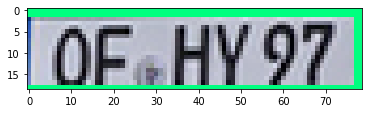

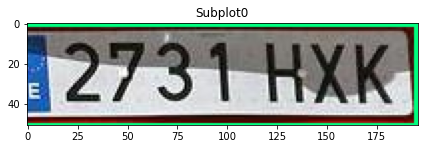

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[13, 2], [190, 2], [190, 47], [13, 47]], '2731 KXK', 0.9235478671290358)]
937


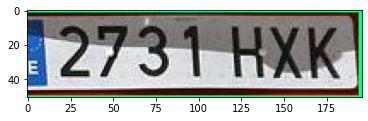

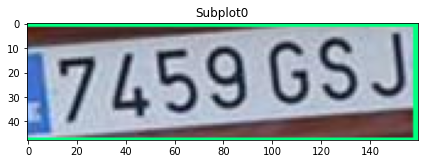

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 0], [160, 0], [160, 48], [3, 48]], '7459 G5J', 0.590197443546852)]
600


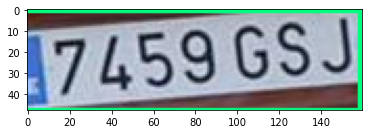

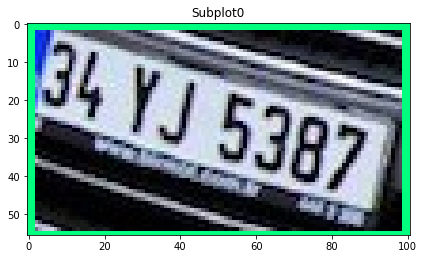

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3.411651594585448, -2.9417420270727606], [97.0, 25.0], [87.58834840541455, 52.94174202707276], [-4.0, 25.0]], 'b4 YJ 5387', 0.17592857015734978)]
2016


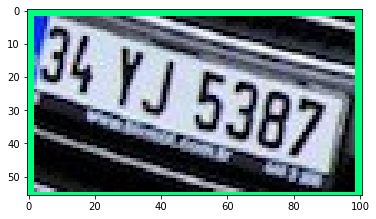

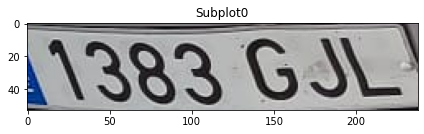

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[8, 2], [230, 2], [230, 53], [8, 53]], '1383 GJL', 0.9851432018440264)]
1512


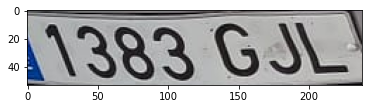

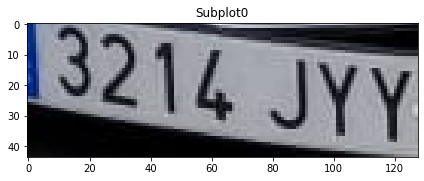

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[5.006498598929184, -5.87465546417618], [77.81031057198719, 4.782817456170758], [70.99350140107082, 40.87465546417618], [-1.8103105719871935, 30.217182543829242]], 'B21L', 0.4718600809574127), ([[76.8713347040338, 4.162537993714918], [131.6438167208877, 11.349969786767822], [126.1286652959662, 45.83746200628508], [71.35618327911227, 38.65003021323218]], 'JYY', 0.9369267511483931)]
1512


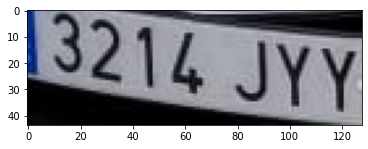

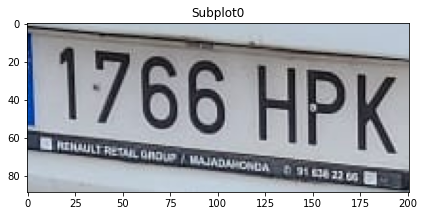

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[4, 2], [201, 2], [201, 79], [4, 79]], '4766 HPK', 0.6469927944090895), ([[13.445299803774772, 58.16794970566215], [78.99988167780826, 65.98461720495679], [77.55470019622523, 74.83205029433785], [12.00011832219174, 67.01538279504321]], 'Trmault Wauaaundte', 0.0021344723957214093), ([[81.32732720600369, 66.26005992660406], [116.9935326726564, 69.88645340883927], [115.67267279399631, 78.73994007339594], [80.0064673273436, 74.11354659116073]], 'Kkane', 0.003003563530073303), ([[139.39028923915032, 72.2073760108954], [182.9957012159921, 76.9073766310705], [181.60971076084968, 86.7926239891046], [138.0042987840079, 81.0926233689295]], 'Oc', 0.008944300560530307)]
1500


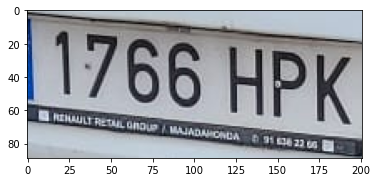

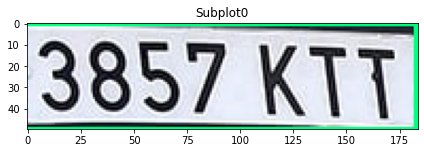

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [182, 0], [182, 50], [0, 50]], '3857 KTT', 0.9478229559212352)]


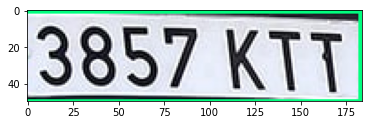

In [353]:
import time
for i,pos in enumerate(files[:]):
    IMAGE_PATH=pos
    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    detection_threshold=0.5
    image=image_np_with_detections
    scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    print(image.shape[1])

    width=image.shape[1]
    width2=image.shape[1]+1.2*image.shape[1]/100
    height=image.shape[0]

    for idx,box in enumerate(boxes):
        roi=box*[height,width2,height,width]
        region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        
        width=5
        height=5
        rows = 1
        cols = 1
        axes=[]
        fig=plt.figure()

        for a in range(rows*cols):
            b = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)
            axes.append( fig.add_subplot(rows, cols, a+1) )
            subplot_title=("Subplot"+str(a))
            axes[-1].set_title(subplot_title)  
            plt.imshow(b)
        fig.tight_layout()    
        plt.show()
        try:
            reader=easyocr.Reader(['en'])
            ocr_result = reader.readtext(region)
            print(ocr_result)
            plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        except:
            re=2
    
    

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')